# Landfall comparison for TCLV data

We plot landfall rates for both historical and synthetic (i.e. TCRM generated) TC datasets to allow comparison. This notebook is set up for the SWHA Q project, but conceptually could readily be applied to a catalogue that covers all of Australia or another part of Australia (e.g. WA coastline).

### Notes
* The '40' that appears in some cells represents the number of years used in the TCRM simulation - i.e. we simulated (for example) 500 simulations, each representing 40 years of TC activity. This is chosen because the observational record covers the period 1981-2021 (actually 41, but close enough).
* Some of the figures presented in the SWHA SEQ report only show landfalls around south east Qld - this can be changed here by adjusting the `ax.set_xlim()` ranges. 

In [1]:
%matplotlib inline
import os
from os.path import join as pjoin
from matplotlib import pyplot as plt
from matplotlib import patheffects

import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('ticks')
sns.set_context('talk')
pe = patheffects.withStroke(foreground="white", linewidth=5)

In [2]:
obsdf = pd.read_csv(r"X:\georisk\archive\proj\2018\tcha\backup\obs_landfall.csv", index_col="gate")
obsdffull = pd.read_csv(r"X:\georisk\archive\proj\2018\tcha\backup\obs_landfall_full.csv", index_col="gate")

syndf = pd.read_csv(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\derived\TCLV\landfall\simulated_landfall_rates.csv", index_col="gate")

syndf = pd.read_csv(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\derived\hazard\HISTORICAL_1981_2010_EVAL\plots\stats\dev\sim_landfall.csv", index_col="gate")

In [3]:
newdf = obsdf[["label", "count", "prob", "rate"]].join(syndf[['count_sum', 'count_nanmean', 'count_nanstd']])
newdf['diff'] = newdf['rate'] - newdf['count_nanmean']/40

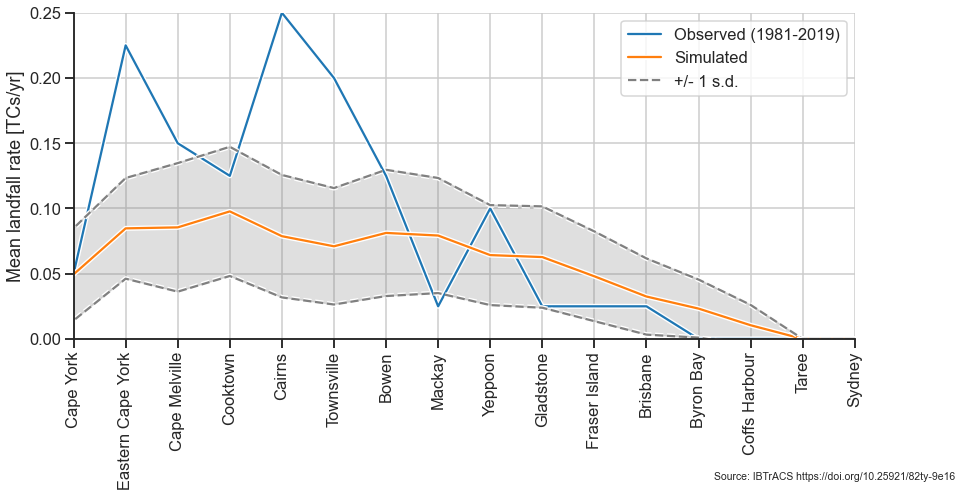

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))
ax.plot(newdf.index, newdf["rate"], path_effects=[pe], label="Observed (1981-2019)")
#ax.plot(obsdffull.index, obsdffull["rate"], path_effects=[pe], label="Observed (1906-2019)", ls='--', alpha=0.5)

ax.plot(newdf.index, newdf["count_nanmean"]/40, path_effects=[pe], label="Simulated")
ax.fill_between(newdf.index, (newdf["count_nanmean"]+newdf["count_nanstd"])/40, (newdf["count_nanmean"]-newdf["count_nanstd"])/40, color='gray', alpha=0.25)
ax.plot(newdf.index, (newdf["count_nanmean"]+newdf["count_nanstd"])/40, path_effects=[pe], ls='--', color='0.5', label="+/- 1 s.d.")
ax.plot(newdf.index, (newdf["count_nanmean"]-newdf["count_nanstd"])/40, path_effects=[pe], ls='--', color='0.5')
ax.set_xticks(np.arange(0,49))
ax.set_ylim((0, 0.25))
ax.set_ylabel("Mean landfall rate [TCs/yr]")
ax.set_yticks(np.arange(0.0,0.26,.05))
ax.set_xticklabels(newdf['label'], rotation='vertical')
ax.set_xlim((31,46))
ax.legend()
#ax.axhline(color='k', linestyle='--',path_effects=[pe])
sns.despine()
ax.grid()
plt.text(1.0, -0.2, f"Source: IBTrACS https://doi.org/10.25921/82ty-9e16", transform=fig.transFigure, fontsize='xx-small', ha='right',)
plt.savefig(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\derived\hazard\HISTORICAL_1981_2010_EVAL\plots\stats\dev\simulated_landfall_rates.png", bbox_inches='tight')

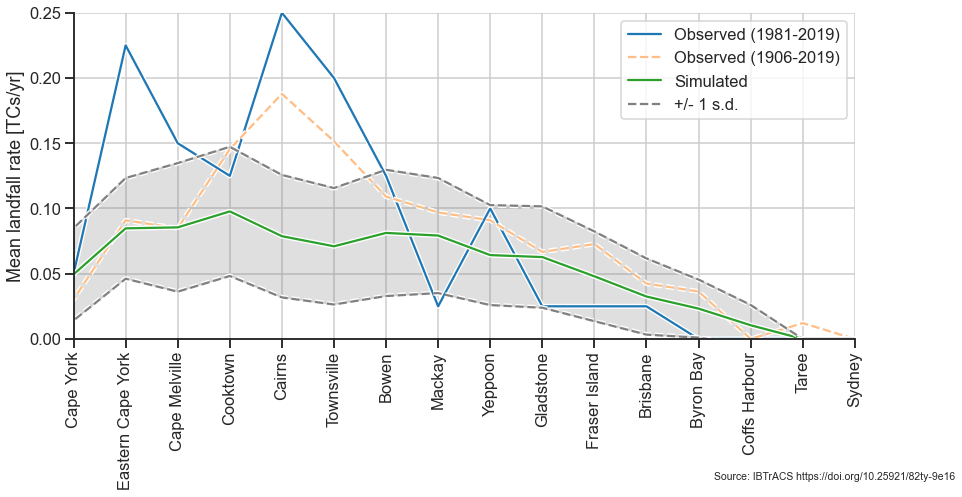

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))
ax.plot(newdf.index, newdf["rate"], path_effects=[pe], label="Observed (1981-2019)")
ax.plot(obsdffull.index, obsdffull["rate"], path_effects=[pe], label="Observed (1906-2019)", ls='--', alpha=0.5)

ax.plot(newdf.index, newdf["count_nanmean"]/40, path_effects=[pe], label="Simulated")
ax.fill_between(newdf.index, (newdf["count_nanmean"]+newdf["count_nanstd"])/40, (newdf["count_nanmean"]-newdf["count_nanstd"])/40, color='gray', alpha=0.25)
ax.plot(newdf.index, (newdf["count_nanmean"]+newdf["count_nanstd"])/40, path_effects=[pe], ls='--', color='0.5', label="+/- 1 s.d.")
ax.plot(newdf.index, (newdf["count_nanmean"]-newdf["count_nanstd"])/40, path_effects=[pe], ls='--', color='0.5')
ax.set_xticks(np.arange(0,49))
ax.set_ylim((0, 0.25))
ax.set_ylabel("Mean landfall rate [TCs/yr]")
ax.set_yticks(np.arange(0.0,0.26,.05))
ax.set_xticklabels(newdf['label'], rotation='vertical')
ax.set_xlim((31,46))
ax.legend()
#ax.axhline(color='k', linestyle='--',path_effects=[pe])
sns.despine()
ax.grid()
plt.text(1.0, -0.2, f"Source: IBTrACS https://doi.org/10.25921/82ty-9e16", transform=fig.transFigure, fontsize='xx-small', ha='right',)
plt.savefig(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\derived\hazard\HISTORICAL_1981_2010_EVAL\plots\stats\dev\simulated_landfall_rates_fullhist.png", bbox_inches='tight')

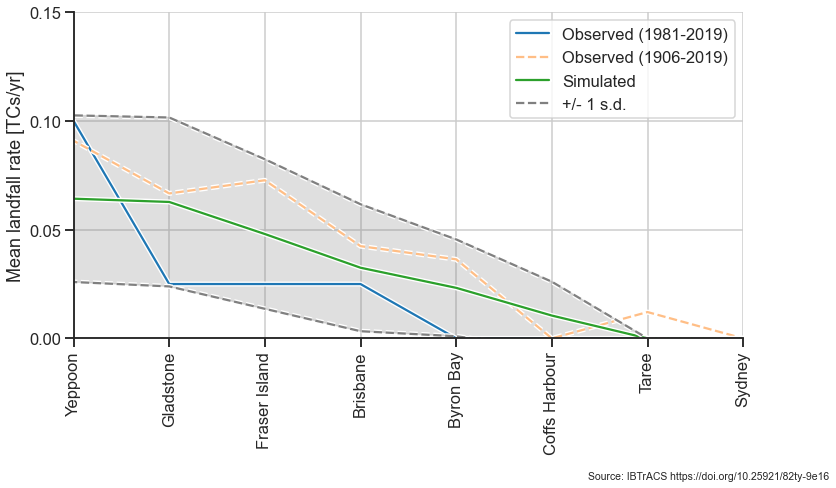

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.plot(newdf.index, newdf["rate"], path_effects=[pe], label="Observed (1981-2019)")
ax.plot(obsdffull.index, obsdffull["rate"], path_effects=[pe], label="Observed (1906-2019)", ls='--', alpha=0.5)

ax.plot(newdf.index, newdf["count_nanmean"]/40, path_effects=[pe], label="Simulated")
ax.fill_between(newdf.index, (newdf["count_nanmean"]+newdf["count_nanstd"])/40, (newdf["count_nanmean"]-newdf["count_nanstd"])/40, color='gray', alpha=0.25)
ax.plot(newdf.index, (newdf["count_nanmean"]+newdf["count_nanstd"])/40, path_effects=[pe], ls='--', color='0.5', label="+/- 1 s.d.")
ax.plot(newdf.index, (newdf["count_nanmean"]-newdf["count_nanstd"])/40, path_effects=[pe], ls='--', color='0.5')
ax.set_xticks(np.arange(0,49))
ax.set_ylim((0, 0.15))
ax.set_ylabel("Mean landfall rate [TCs/yr]")
ax.set_yticks(np.arange(0.0,0.16,.05))
ax.set_xticklabels(newdf['label'], rotation='vertical')
ax.set_xlim((39,46))
ax.legend()
#ax.axhline(color='k', linestyle='--',path_effects=[pe])
sns.despine()
ax.grid()
plt.text(1.0, -0.2, f"Source: IBTrACS https://doi.org/10.25921/82ty-9e16", transform=fig.transFigure, fontsize='xx-small', ha='right',)
plt.savefig(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\derived\hazard\HISTORICAL_1981_2010_EVAL\plots\stats\dev\simulated_landfall_rates_fullhist.SEQ.png", bbox_inches='tight')

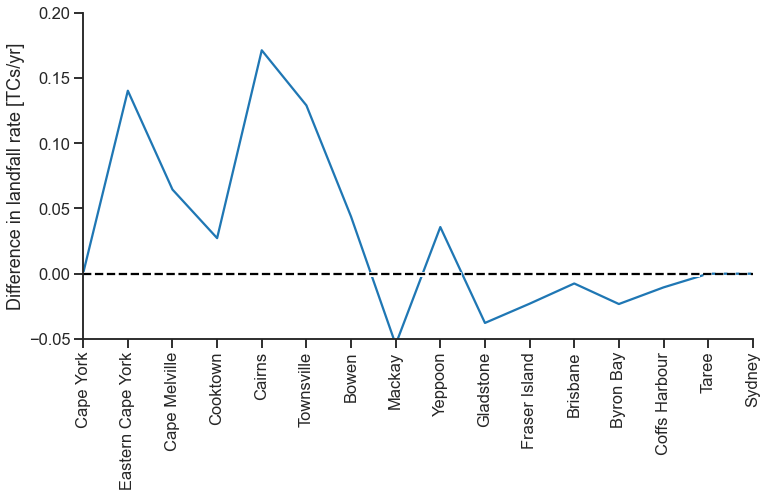

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.plot(newdf.index, newdf["diff"], path_effects=[pe])
ax.set_xticks(np.arange(0,49))
ax.set_ylim((-0.05, 0.2))
ax.set_ylabel("Difference in landfall rate [TCs/yr]")
ax.set_yticks(np.arange(-0.05,0.21,.05))
ax.set_xticklabels(newdf['label'], rotation='vertical')
ax.set_xlim((31,46))
ax.axhline(color='k', linestyle='--',path_effects=[pe])
sns.despine()
plt.savefig(r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\derived\hazard\HISTORICAL_1981_2010_EVAL\plots\stats\dev\simulated_landfall_rates_diff.png", bbox_inches='tight')


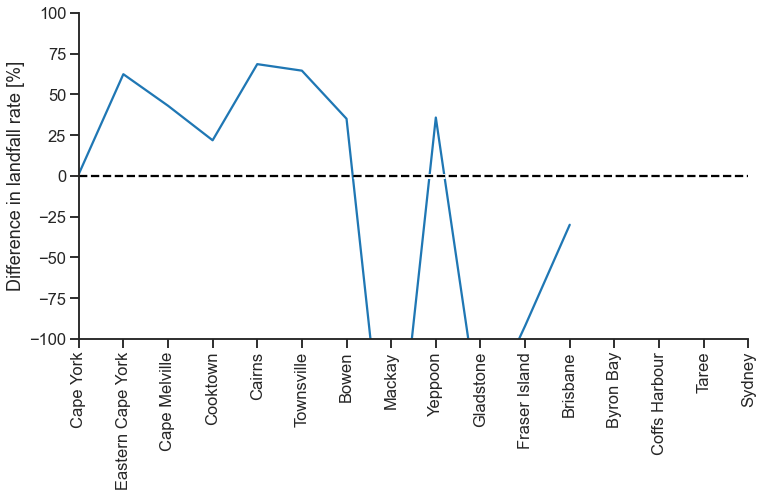

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.plot(newdf.index, 100*newdf["diff"]/newdf['rate'], path_effects=[pe])
ax.set_xticks(np.arange(0,49))
ax.set_ylim((-100., 100.))
ax.set_ylabel("Difference in landfall rate [%]")
#ax.set_yticks(np.arange(-0.05,0.21,.025))
ax.set_xticklabels(newdf['label'], rotation='vertical')
ax.set_xlim((31,46))
ax.axhline(color='k', linestyle='--',path_effects=[pe])
sns.despine()
#plt.savefig(r"C:\WorkSpace\swhaq\data\tclv\landfall\simulated_landfall_rates_diff.png", bbox_inches='tight')